# Task 3 extra: Predictive Analysis

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

## Loading the extra Customer Profile model

In [30]:
extra_customer_profile = pd.read_csv('../dataset/extra_customer_profile_kmeans.csv', sep='\t', index_col=0)
extra_customer_profile

,Savg,categ_-1,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,categ_6,categ_7,categ_8,categ_9,categ_10,categ_11,categ_12,categ_13,categ_14,categ_15,cluster
CustomerID,,,,,,,,,,,,,,,,,,,
12347.0,599.701667,34.626662,0.763713,4.085365,1.462950,12.247757,14.858777,2.159407,1.547992,0.000000,0.767048,1.550771,8.037330,2.876430,3.518416,1.000497,9.146214,1.350672,0
12348.0,261.480000,52.608230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.323543,0.000000,0.000000,0.000000,42.068227,0.000000,0.000000,0.000000,0.000000,0.000000,0
12349.0,1457.550000,51.185894,0.000000,5.176495,3.980652,0.000000,4.497273,0.455559,12.785839,0.000000,0.000000,1.029124,1.365305,8.897122,4.472574,5.433776,0.720387,0.000000,0
12350.0,294.400000,44.565217,0.000000,0.000000,23.029891,0.000000,6.929348,0.000000,13.654891,0.000000,0.000000,0.000000,0.000000,0.000000,6.725543,5.095109,0.000000,0.000000,0
12352.0,210.901667,51.985522,0.000000,1.327633,4.512371,2.560435,8.167313,1.173533,3.056717,0.000000,0.924602,1.849203,1.173533,11.039900,0.000000,1.185387,5.626635,5.417217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,180.600000,38.842746,0.000000,0.000000,0.000000,16.611296,0.000000,0.000000,0.000000,0.000000,0.000000,21.594684,0.000000,0.000000,0.000000,9.883721,0.000000,13.067553,0
18281.0,80.820000,41.945063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.930958,0.000000,0.000000,0.000000,0.000000,0.000000,39.123979,0
18282.0,88.300000,21.002265,0.000000,7.644394,7.061155,0.000000,41.223103,0.000000,0.000000,0.000000,12.995470,0.000000,7.219706,0.000000,0.000000,0.000000,0.000000,2.853907,1


In [31]:
extra_customer_profile = extra_customer_profile.to_numpy()

In [32]:
def plot_learning_curve(estimator, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5), 
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(estimator.__class__.__name__) + ' learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend().get_frame().set_facecolor('white')
    plt.show()
    
def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

## SVC

In [33]:
from sklearn.svm import SVC

In [38]:
X, y = extra_customer_profile[:, :-1], extra_customer_profile[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('svc', SVC())])

tuned_parameters = {'svc__kernel': ('linear', 'poly', 'rbf'),
                    'svc__C': (0.1, 1, 10, 100, 1000)}

grid = GridSearchCV(pipeline,
                    param_grid=tuned_parameters,
                    scoring='accuracy',
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full development set
                    return_train_score=True,
                    verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished


In [39]:
df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
df.rename(columns={'mean_test_score': 'mean_val_score', 
                   'rank_test_score': 'rank_val_score'}, inplace=True)

df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

params,mean_train_score,mean_val_score,rank_val_score
"{'svc__C': 100, 'svc__kernel': 'linear'}",0.999287,0.993025,1
"{'svc__C': 1000, 'svc__kernel': 'linear'}",0.999921,0.992392,2
"{'svc__C': 10, 'svc__kernel': 'linear'}",0.997463,0.990806,3
"{'svc__C': 1, 'svc__kernel': 'linear'}",0.994531,0.989537,4
"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.988031,0.984146,5
"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.998018,0.972415,6
"{'svc__C': 100, 'svc__kernel': 'rbf'}",1.000000,0.965124,7
"{'svc__C': 1000, 'svc__kernel': 'rbf'}",1.000000,0.963855,8
"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.984781,0.962903,9
"{'svc__C': 1000, 'svc__kernel': 'poly'}",0.998256,0.948000,10


In [40]:
accuracy_score(grid.best_estimator_.predict(X_test), y_test)

0.9942965779467681

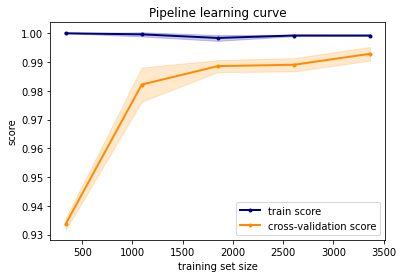

In [41]:
plot_learning_curve(grid.best_estimator_, X, y)